## Q.11. 均值滤波器

使用均值滤波器（3x3）来进行滤波吧！

均值滤波器使用网格内像素的平均值。

| 输入 (imori.jpg) | 输出 (answers/answer_11.jpg) |
| :--------------: | :--------------------------: |
|  ![](imori.jpg)  |  ![](answers/answer_11.jpg)  |

In [3]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H,W,C = img.shape

K_size = 3

pad = K_size //2
out = np.zeros((H+pad*2,W+pad*2,C),dtype = np.float)
out[pad:pad+H,pad:pad+W] = img.copy().astype(np.float)

tmp = out.copy()

for i in range(H):
    for j in range(W):
        for k in range(C):
            out[i+pad,j+pad,k] = np.mean(tmp[i:i+K_size,j:j+K_size,k])

out = out[pad:pad+H,pad:pad+W].astype(np.uint8)

cv2.imshow('',out)
cv2.waitKey(0)

-1

## Q.12. Motion Filter

使用3x3的 Motion Filter 来进行滤波吧。

Motion Filter 取对角线方向的像素的平均值，像下式这样定义：

```bash
  1/3  0   0
[  0  1/3  0 ]
   0   0  1/3
```
| 输入 (imori.jpg) | 输出 (answers/answer_12.jpg) |
| :--------------: | :--------------------------: |
|  ![](imori.jpg)  |  ![](answers/answer_12.jpg)  |

In [16]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H,W,C =img.shape

K_size = 3

pad = K_size //2

out = np.zeros((pad*2+H,pad*2+W,C),dtype=np.float)
out[pad:pad+H,pad:pad+W] = img.copy().astype(np.float)

tmp = out.copy()

K = np.diag([1/K_size]*3)

for i in range(H):
    for j in range(W):
        for k in range(C):
            out[i+pad,j+pad,k] = np.sum(K*tmp[i:i+K_size,j:j+K_size,k])

out = out[pad:pad+H,pad:pad+W].astype(np.uint8)
cv2.imshow('',out)
cv2.waitKey(0)




-1

## Q.13. MAX-MIN 滤波器

使用 MAX-MIN 滤波器来进行滤波吧。

MAX-MIN 滤波器使用网格内像素的最大值和最小值的差值对网格内像素重新赋值。通常用于**边缘检测**。边缘检测用于检测图像中的线。像这样提取图像中的信息的操作被称为**特征提取**。边缘检测通常在灰度图像上进行。  
灰度化：Y = 0.2126 R + 0.7152 G + 0.0722 B  

| 输入 (imori.jpg) | 输出 (answers/answer_13.jpg) |
| :--------------: | :--------------------------: |
|  ![](imori.jpg)  |  ![](answers/answer_13.jpg)  |

In [23]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H,W,C = img.shape
blue = img[:,:,0].copy()
green = img[:,:,1].copy()
red = img[:,:,2].copy()

Y = 0.2126*red + 0.7152*green + 0.0722*blue
Y = Y.astype(np.uint8)

K_size = 3

pad = K_size //2

out = np.zeros((pad*2+H,pad*2+W),dtype=np.float)
out[pad:pad+H,pad:pad+W] = Y.copy().astype(np.float)

tmp = out.copy()

for i in range(H):
    for j in range(W):
        out[i+pad,j+pad] = np.max(tmp[i:i+K_size,j:j+K_size]) - np.min(tmp[i:i+K_size,j:j+K_size])
        
out = out[pad:pad+H,pad:pad+W].astype(np.uint8)

cv2.imshow('',out)
cv2.waitKey(0)

-1

## Q.14. 微分滤波器

使用3x3的微分滤波器来进行滤波吧。

微分滤波器对图像亮度急剧变化的边缘有提取效果，可以获得邻接像素的差值。

```bash
    (a)纵向         (b)横向
      0 -1  0            0 0 0
K = [ 0  1  0 ]   K = [ -1 1 0 ]
      0  0  0            0 0 0
```
| 输入 (imori.jpg) | 输出・纵向 (answers/answer_14_v.jpg) | 输出・横向 (answers/answer_14_h.jpg) |
| :--------------: | :----------------------------------: | :----------------------------------: |
|  ![](imori.jpg)  |     ![](answers/answer_14_v.jpg)     |     ![](answers/answer_14_h.jpg)     |

In [26]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H,W,C = img.shape
blue = img[:,:,0].copy()
green = img[:,:,1].copy()
red = img[:,:,2].copy()

Y = 0.2126*red + 0.7152*green + 0.0722*blue
Y = Y.astype(np.uint8)

K_size = 3

pad = K_size //2

out = np.zeros((pad*2+H,pad*2+W),dtype=np.float)
out[pad:pad+H,pad:pad+W] = Y.copy().astype(np.float)

tmp = out.copy()

out_a = out.copy()
out_b = out.copy()

Ka = [[0.,-1.,0.],[0.,1.,0.],[0.,0.,0.]]
Kb = [[0.,0.,0.],[-1..,1.,0.],[0.,0.,0.]]

for i in range(H):
    for j in range(W):
        out_a[pad+i,pad+j] = np.sum(Ka*tmp[i:i+K_size,j:j+K_size])
        out_b[pad+i,pad+j] = np.sum(Kb*tmp[i:i+K_size,j:j+K_size])
        
out_a[out_a < 0] = 0
out_b[out_b < 0] = 0
out_a[out_a > 255] = 255
out_b[out_b > 255] = 255

out_a = out_a[pad:pad+H,pad:pad+W].astype(np.uint8)
out_b = out_b[pad:pad+H,pad:pad+W].astype(np.uint8)

cv2.imshow('',out_a)
cv2.waitKey(0)
cv2.imshow('',out_b)
cv2.waitKey(0)

-1

## Q.15. Sobel 滤波器

使用3x3的 Sobel 滤波器来进行滤波吧。

Sobel 滤波器可以提取特定方向的边缘，滤波器按下式定义：

```bash
    (a)纵向       (b)横向
      1 0 -1            1  2  1
K = [ 2 0 -2 ]   K = [  0  0  0 ]
      1 0 -1           -1 -2 -1
```
| 输入 (imori.jpg) | 输出・纵向 (answers/answer_15_v.jpg) | 输出・横向 (answers/answer_15_h.jpg) |
| :--------------: | :----------------------------------: | :----------------------------------: |
|  ![](imori.jpg)  |     ![](answers/answer_15_v.jpg)     |     ![](answers/answer_15_h.jpg)     |

In [27]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H,W,C = img.shape

blue = img[...,0].copy()
green = img[...,1].copy()
red = img[...,2].copy()

Y = 0.2126*red + 0.7152*green + 0.0722*blue
Y = Y.astype(np.uint8)

K_size = 3
pad = K_size //2

out = np.zeros((pad*2+H,pad*2+W),dtype=np.float)
out[pad:pad+H,pad:pad+W] = Y.copy().astype(np.float)

tmp = out.copy()

out_a = out.copy()
out_b = out.copy()

K_a = [[1.,0.,-1.],[2.,0.,-2.],[1.,0.,-1.]]
K_b = [[1.,2.,1.],[0.,0.,0.],[-1.,-2.,-1.]]

for i in range(H):
    for j in range(W):
        out_a[i+pad,j+pad] = np.sum(K_a*tmp[i:i+K_size,j:j+K_size])
        out_b[i+pad,j+pad] = np.sum(K_b*tmp[i:i+K_size,j:j+K_size])
        
out_a[out_a<0] = 0
out_b[out_b<0] = 0
out_a[out_a>255] = 255
out_b[out_b>255] = 255

out_a = out_a[pad:pad+H,pad:pad+W].astype(np.uint8)
out_b = out_b[pad:pad+H,pad:pad+W].astype(np.uint8)

cv2.imshow('',out_a)
cv2.waitKey(0)
cv2.imshow('',out_b)
cv2.waitKey(0)

-1

## Q.16. Prewitt 滤波器

使用3x3的 Prewitt 滤波器来进行滤波吧。

Prewitt 滤波器是用于边缘检测的一种滤波器，使用下式定义：

```bash
    (a)纵向          (b)横向
      -1 -1 -1          -1 0 1
K = [  0  0  0 ]  K = [ -1 0 1 ]
       1  1  1          -1 0 1
```
| 输入 (imori.jpg) | 输出・纵向 (answers/answer_16_v.jpg) | 输出・横向 (answers/answer_16_h.jpg) |
| :--------------: | :----------------------------------: | :----------------------------------: |
|  ![](imori.jpg)  |     ![](answers/answer_16_v.jpg)     |     ![](answers/answer_16_h.jpg)     |

In [29]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H,W,C = img.shape

blue = img[...,0].copy()
green = img[...,1].copy()
red = img[...,2].copy()

Y = 0.2126*red + 0.7152*green + 0.0722*blue
Y = Y.astype(np.uint8)

K_size = 3
pad = K_size // 2

out = np.zeros((pad*2+H,pad*2+W),dtype=np.float)
out[pad:pad+H,pad:pad+W] = Y.copy().astype(np.float)

tmp = out.copy()
out_a = out.copy()
out_b = out.copy()

K_a =[[-1.,-1.,-1],[0.,0.,0.],[1.,1.,1.]]
K_b = [[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]]

for i in range(H):
    for j in range(W):
        out_a[pad+i,pad+j] = np.sum(K_a*tmp[i:i+K_size,j:j+K_size])
        out_b[pad+i,pad+j] = np.sum(K_b*tmp[i:i+K_size,j:j+K_size])
        
out_a[out_a<0] = 0
out_b[out_b<0] = 0
out_a[out_a>255] = 255
out_b[out_b>255] = 255

out_a = out_a[pad:pad+H,pad:pad+W].astype(np.uint8)
out_b = out_b[pad:pad+H,pad:pad+W].astype(np.uint8)

cv2.imshow('',out_a)
cv2.waitKey(0)
cv2.imshow('',out_b)
cv2.waitKey(0)

-1

## Q.17. Laplacian 滤波器

使用 Laplacian 滤波器来进行滤波吧。

Laplacian 滤波器是对图像亮度进行二次微分从而检测边缘的滤波器。由于数字图像是离散的，x 方向和 y 方向的一次微分分别按照以下式子计算：

```bash
Ix(x,y) = (I(x+1, y) - I(x,y)) / ((x+1)-x) = I(x+1, y) - I(x,y)
Iy(x,y) = (I(x, y+1) - I(x,y)) / ((y+1)-y) = I(x, y+1) - I(x,y)
```

因此二次微分按照以下式子计算：

```bash
Ixx(x,y) = (Ix(x,y) - Ix(x-1,y)) / ((x+1)-x) = Ix(x,y) - Ix(x-1,y)
         = (I(x+1, y) - I(x,y)) - (I(x, y) - I(x-1,y))
         = I(x+1,y) - 2 * I(x,y) + I(x-1,y)
Iyy(x,y) = ... = I(x,y+1) - 2 * I(x,y) + I(x,y-1)
```

特此，Laplacian 表达式如下：

```bash
D^2 I(x,y) = Ixx(x,y) + Iyy(x,y)
           = I(x-1,y) + I(x,y-1) - 4 * I(x,y) + I(x+1,y) + I(x,y+1)
```

如果把这个式子表示为卷积核是下面这样的：

```bash
      0  1  0
K = [ 1 -4  1 ]
      0  1  0
```
| 输入 (imori.jpg) | 输出(answers/answer_17.jpg) |
| :--------------: | :-------------------------: |
|  ![](imori.jpg)  | ![](answers/answer_17.jpg)  |  |

In [30]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H,W,C = img.shape

blue = img[...,0].copy()
green = img[...,1].copy()
red = img[...,2].copy()

Y = 0.2126*red + 0.7152*green + 0.0722*blue
Y = Y.astype(np.uint8)

K_size = 3
pad = K_size //2

out = np.zeros((pad*2+H,pad*2+W),dtype=np.float)
out[pad:pad+H,pad:pad+W] = Y.copy().astype(np.float)

tmp = out.copy()

K = [[0.,1.,0.],[1.,-4.,1.],[0.,1.,0.]]

for i in range(H):
    for j in range(W):
        out[i+pad,j+pad] = np.sum(K*tmp[i:i+K_size,j:j+K_size])
        
        
out[out<0] = 0
out[out>255] = 255

out = out[pad:pad+H,pad:pad+W].astype(np.uint8)


cv2.imshow('',out)
cv2.waitKey(0)


-1

## Q.18. Emboss 滤波器

使用 Emboss 滤波器来进行滤波吧。

Emboss 滤波器可以使物体轮廓更加清晰，按照以下式子定义：

```bash
      -2 -1  0
K = [ -1  1  1 ]
       0  1  2
```
| 输入 (imori.jpg) | 输出(answers/answer_18.jpg) |
| :--------------: | :-------------------------: |
|  ![](imori.jpg)  | ![](answers/answer_18.jpg)  |

In [31]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H,W,C = img.shape

blue = img[...,0].copy()
green = img[...,1].copy()
red = img[...,2].copy()

Y = 0.2126*red + 0.7152*green + 0.0722*blue
Y = Y.astype(np.uint8)

K_size = 3
pad = K_size //2

out = np.zeros((pad*2+H,pad*2+W),dtype=np.float)
out[pad:pad+H,pad:pad+W] = Y.copy().astype(np.float)

tmp = out.copy()

K = [[-2.,-1.,0.],[-1.,1.,1.],[0.,1.,2.]]

for i in range(H):
    for j in range(W):
        out[i+pad,j+pad] = np.sum(K*tmp[i:i+K_size,j:j+K_size])
        
        
out[out<0] = 0
out[out>255] = 255

out = out[pad:pad+H,pad:pad+W].astype(np.uint8)


cv2.imshow('',out)
cv2.waitKey(0)

-1

## Q.19. LoG 滤波器

使用 LoG  滤波器，来对`imori_noise.jpg`检测边缘吧！

 LoG  即高斯-拉普拉斯（ Laplacian of Gaussian ）的缩写，使用高斯滤波器使图像平滑化之后再使用拉普拉斯滤波器使图像的轮廓更加清晰。

为了防止拉普拉斯滤波器计算二次微分会使得图像噪声更加明显，所以我们首先使用高斯滤波器来抑制噪声。

 LoG  滤波器使用以下式子定义：

```bash
LoG(x,y) = (x^2 + y^2 - s^2) / (2 * pi * s^6) * exp(-(x^2+y^2) / (2*s^2))
```
| 输入 (imori_noise.jpg) | 输出 (answers/answer_19.jpg) |
| :--------------------: | :--------------------------: |
|  ![](imori_noise.jpg)  |  ![](answers/answer_19.jpg)  |

In [36]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H,W,C = img.shape

blue = img[...,0].copy()
green = img[...,1].copy()
red = img[...,2].copy()

Y = 0.2126*red + 0.7152*green + 0.0722*blue
Y = Y.astype(np.uint8)

K_size = 5
s = 3
pad = K_size //2

out = np.zeros((pad*2+H,pad*2+W),dtype=np.float)
out[pad:pad+H,pad:pad+W] = Y.copy().astype(np.float)

tmp = out.copy()

K = np.zeros((K_size,K_size),dtype=np.float)
for i in range(-pad,-pad+K_size):
    for j in range(-pad,-pad+K_size):
        K[i+pad,j+pad] = (i**2+j**2 -s**2)*(np.exp(-(i**2+j**2)/(2*(s**2))))
        
K /= (2*np.pi*(s**6))
K /= K.sum()
for i in range(H):
    for j in range(W):
        out[i+pad,j+pad] = np.sum(K*tmp[i:i+K_size,j:j+K_size])
        
out = out[pad:pad+H,pad:pad+W].astype(np.uint8)


cv2.imshow('',out)
cv2.waitKey(0)

-1

## Q.20. 直方图

使用`Matplotlib`来绘制`imori_dark.jpg`的直方图吧！

直方图显示了不同数值的像素出现的次数。在`Matplotlib`中有`hist()`函数提供绘制直方图的接口。

| 输入 (imori_dark.jpg) | 输出 (answers/answer_20.png) |
| :-------------------: | :--------------------------: |
|  ![](imori_dark.jpg)  |  ![](answers/answer_20.png)  |

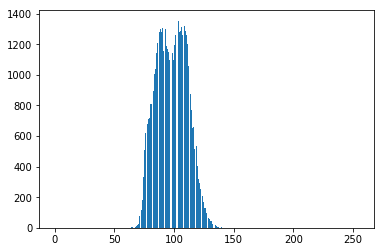

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("imori_dark.jpg")#.astype(np.float)

plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()